# Week 05 Exercises
### 5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to ```data/Justice_Equity_Need_Index.geojson```

Let's start doing some spatial analysis.

1. Load the JENI dataset and view the first few rows. You will notice a column ```sup_dist``` which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean ```jenipctl```. 


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd

JENI_data_path = ("data/Justice_Equity_Need_Index.geojson")
JENI_data = gpd.read_file(JENI_data_path)

JENI_data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [9]:
JENI_data["sup_dist_str"] = JENI_data["sup_dist"].astype(str).str.slice(start=0, stop=10)
JENI_grouped = JENI_data.groupby("sup_dist_str")

In [10]:
JENI_mean = JENI_data.groupby("sup_dist_str")["jenipctl"].mean().reset_index()
JENI_summary = pd.DataFrame(data={"s_dist": JENI_mean["sup_dist_str"], "MEAN": JENI_mean["jenipctl"]})

JENI_summary

,s_dist,MEAN
0,District 1,60.502222
1,District 2,65.157143
2,District 3,38.586667
3,District 4,51.292857
4,District 5,41.464286
5,None,43.500000


2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean ```jenipctl```

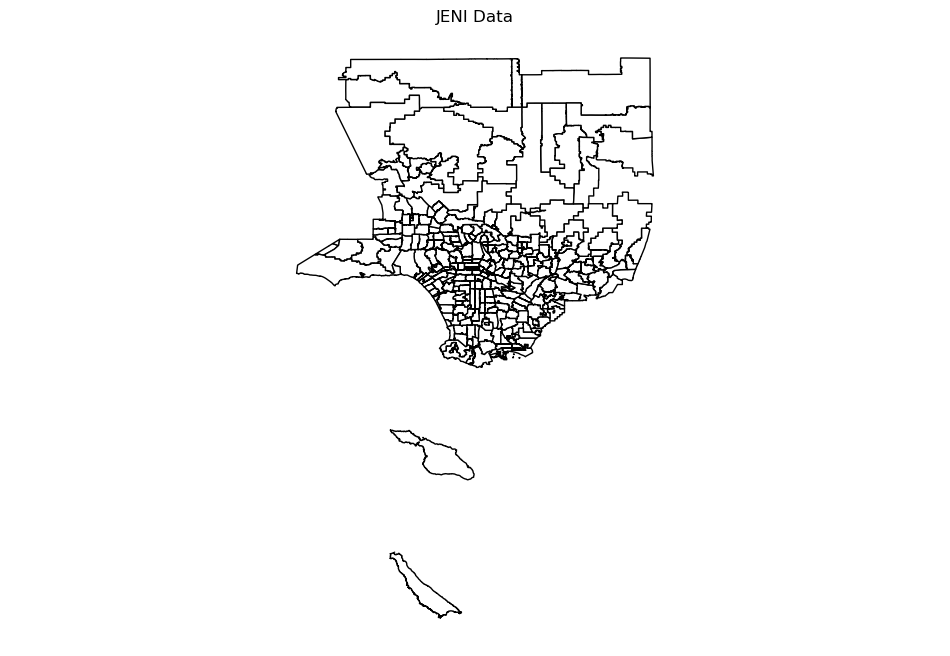

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
JENI_data.plot(ax = ax, facecolor = 'white', edgecolor = 'black')

# Add title to map
ax.set(title="JENI Data")

# Turn off the axis  
plt.axis('equal')
ax.set_axis_off()

plt.show()

3. Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the ```jenipctl``` means.

JENI is the Justice Equity Need Index by Advancement Project California. It identifies the zip codes in greatest need of public investments. JENI pctl refers to the percentile of the JENI data set that falls into each category.

### 5.2 Spatial Joining
Let's use the same ```data/Justice_Equity_Need_Index.geojson``` and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: ```data/LB_City_Boundary.geojson``` and the second is Long Beach neighborhoods: ```data/LB_Neighborhoods.geojson```

1. Clip the original ```data/Justice_Equity_Need_Index.geojson``` by the city of Long Beach boundary. What should you always first check before working with multiple datasets?

In [12]:
JENI_data_path = ("data/Justice_Equity_Need_Index.geojson")
JENI_data = gpd.read_file(JENI_data_path)

LB_data_path = ("data/LB_City_Boundary.geojson")
LB_data = gpd.read_file(LB_data_path)

JENI_data_cl = gpd.clip(LB_data, JENI_data)
JENI_data_cl.crs = LB_data.crs

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


2. Using the clipped version of the JENI dataset, spatially join the ```data/LB_Neighborhoods.geojson``` and your clipped dataset. 

In [15]:
neighborhood_data_path = ("data/LB_Neighborhoods.geojson")
neighborhood_data = gpd.read_file(neighborhood_data_path)

data_join = gpd.sjoin(JENI_data_cl, neighborhood_data, how="inner", op='intersects')
data_join[["featurecla", "index_right", "ALAND"]].head()

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,OBJECTID_left,CITYNAME,CITYCODE,SHAPE_Length_left,SHAPE_Area_left,geometry,index_right,OBJECTID_right,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length_right,SHAPE_Area_right
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788...",20,21,Westside,{9CAD846C-72E2-4173-805D-5202971AA23A},None,NaT,None,NaT,0.065544,0.000226
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788...",53,54,Artcraft Manor,{79707A43-E489-4835-BE52-CF542D760E81},None,NaT,None,NaT,0.053044,0.000155
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788...",74,75,El Dorado West,{EC642B09-9726-4E28-9222-51883EF19E26},None,NaT,None,NaT,0.053025,0.000146
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788...",123,124,Unassigned (Coyote Creek),{206301F2-0B5F-48A4-A14C-951C1DEBEBCC},None,NaT,None,NaT,0.030925,0.000017
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788...",83,84,Sunrise,{F3B3EA7A-9BE3-4BB3-B54F-39B8F60E9860},None,NaT,None,NaT,0.012331,0.000007


3. Make a map that has different color categories for each Long Beach neighborhood by the ```jenipctl```.

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

data_join.plot(column='NEIGHBOR_NAME',
                 legend=True,
                 scheme="patterns",
                 ax=ax1)


leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.5,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods ```jenipctl``` rankings. 

confusion plotting data

### 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

1. The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the ```zip``` and ``` csa ``` columns. 

In [27]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [28]:
JENI_cols = ["zip", "csa"]
distance_data = JENI_data[JENI_cols]
distance_data.head()

,zip,csa
0,91108,City of San Marino
1,90631,City of La Habra Heights
2,90274,City of Rancho Palos Verdes
3,91361,City of Westlake Village
4,90275,City of Rancho Palos Verdes


2. Create the point for LMU's campus assuming the CRS to be ```epsg:4326```. Reproject this point to ```epsg:3857```.

In [29]:
from shapely.geometry import Point
import pycrs

LMU_lon = 33.9710
LMU_lat = -118.4170

LMU = gpd.GeoDataFrame([[Point(LMU_lon, LMU_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])
LMU = LMU.to_crs(epsg=3857)

/opt/tljh/user/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?

In [30]:
distance_data["zip"].centroid
distance_data["csa"].centroid

AttributeError: 'Series' object has no attribute 'centroid'

In [ ]:
distance_data['centroid'] = distance_data.centroid

AttributeError: 'DataFrame' object has no attribute 'to_crs'

4. Using the following function, calculate the distance from the LMU campus to each zip code. 

In [ ]:
dist_LMU_zip = distance_data.apply(calculate_distance, dest_geom=LMU, src_col='zip', target_col='dist to LMU', axis=1)

5. What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

trouble calculating distances